In [1]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

load_dotenv()

AVES_ROOT = Path("data/external/hito")
AVES_ROOT

PosixPath('data/external/hito')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd

from aves.data import eod
from aves.features.utils import normalize_rows, normalize_columns
from aves.config import setup_style

setup_style()
os.getcwd()


'/mnt/c/Users/nacho/OneDrive/Escritorio/supositorios/aves'

In [7]:

df_2021 = gpd.read_file(AVES_ROOT / "Evaluación_de_la_Red_de_Ciclovías_del_Gran_Santiago_según_el_Decreto_102.geojson" )
df_2021_sin = gpd.read_file( AVES_ROOT / "siniestros_bicicletas" / "geojson" / "Siniestros_con_participación_de_bicicletas,_RM_Chile,_2021..geojson")

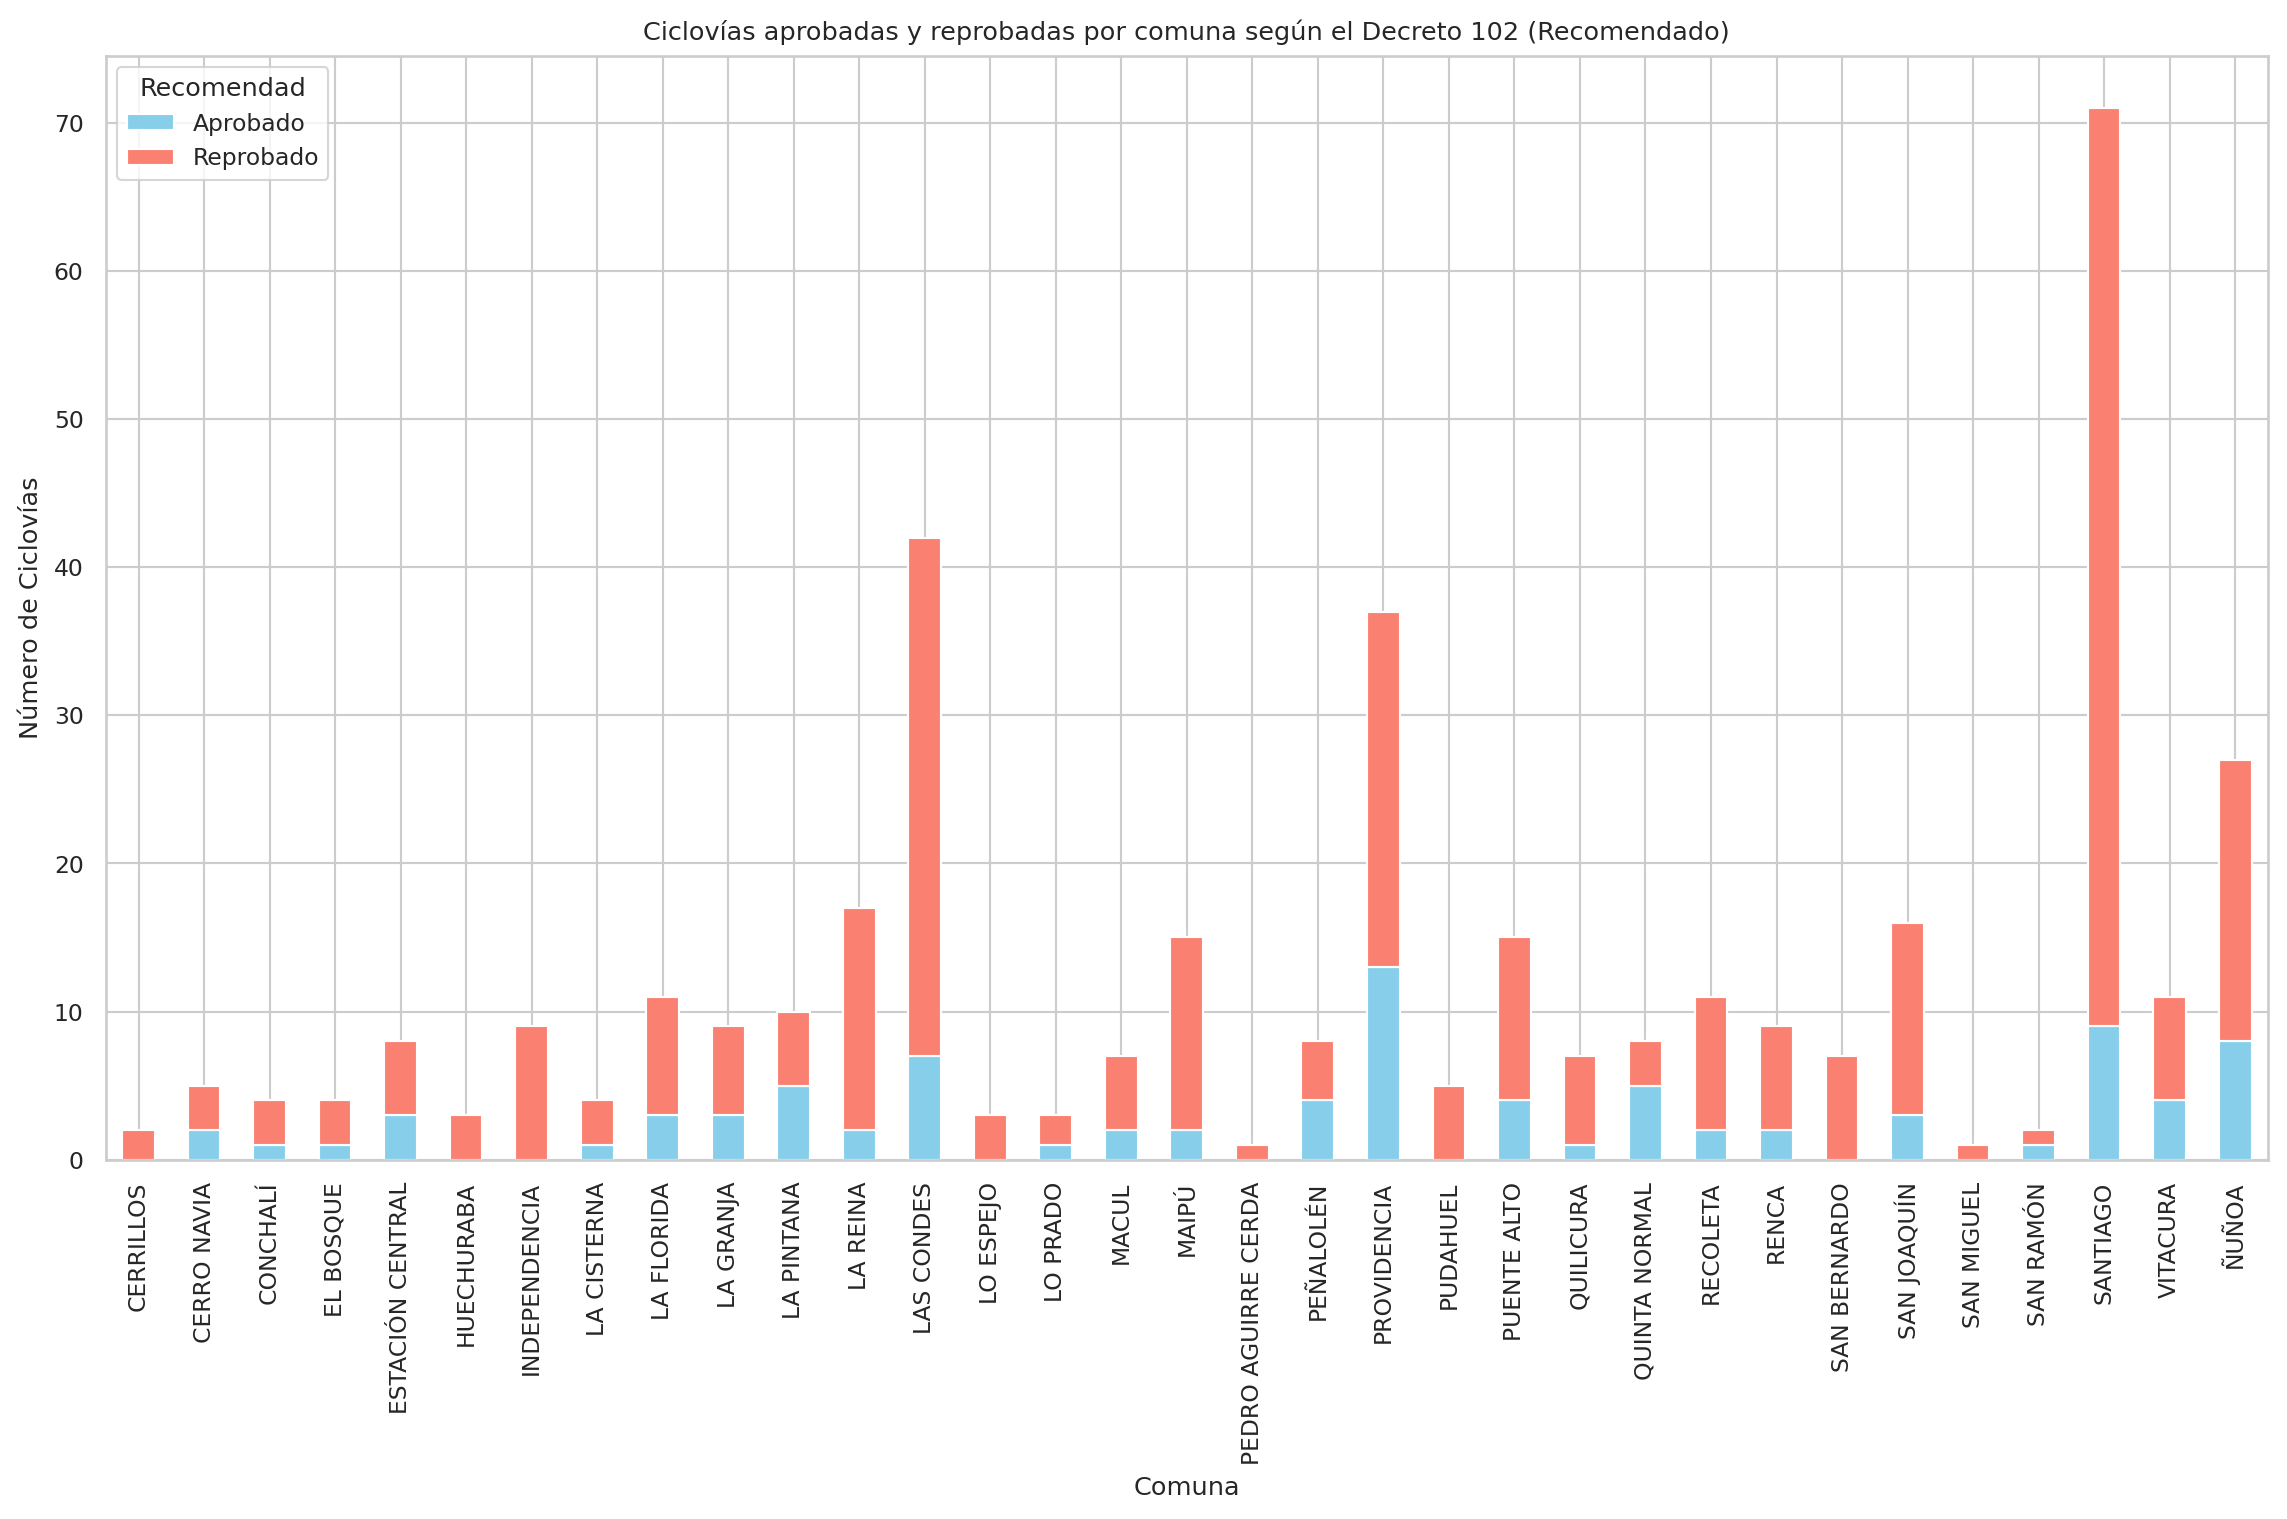

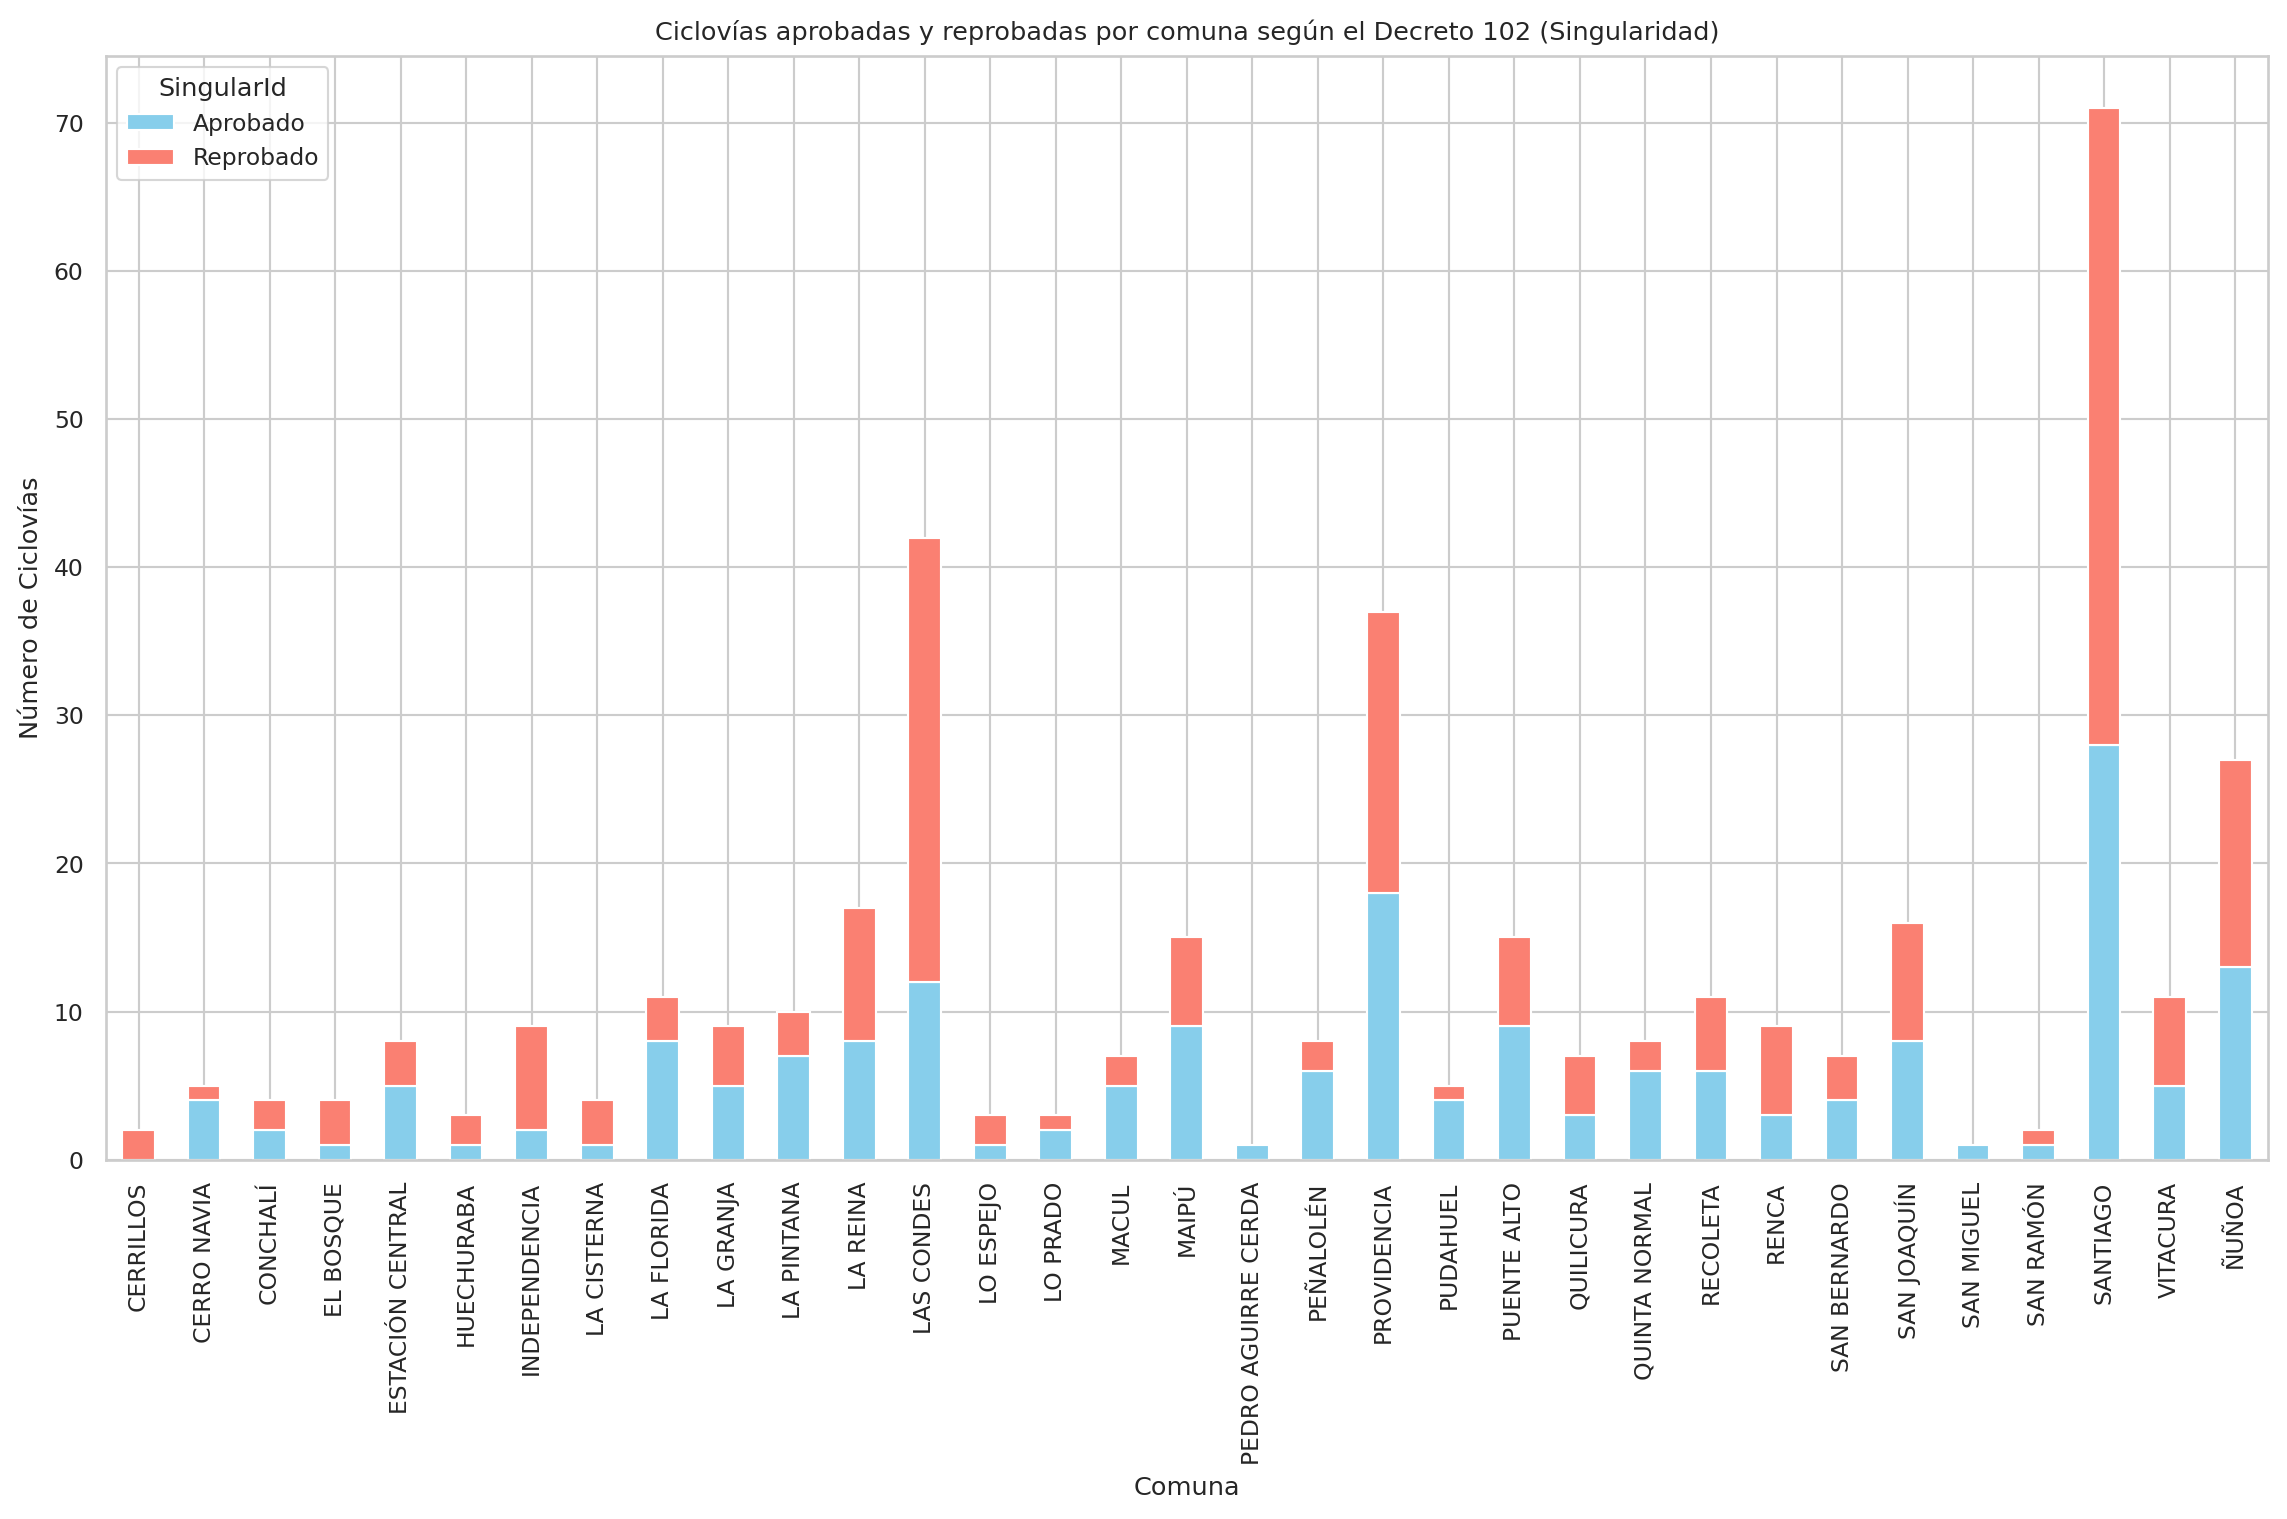

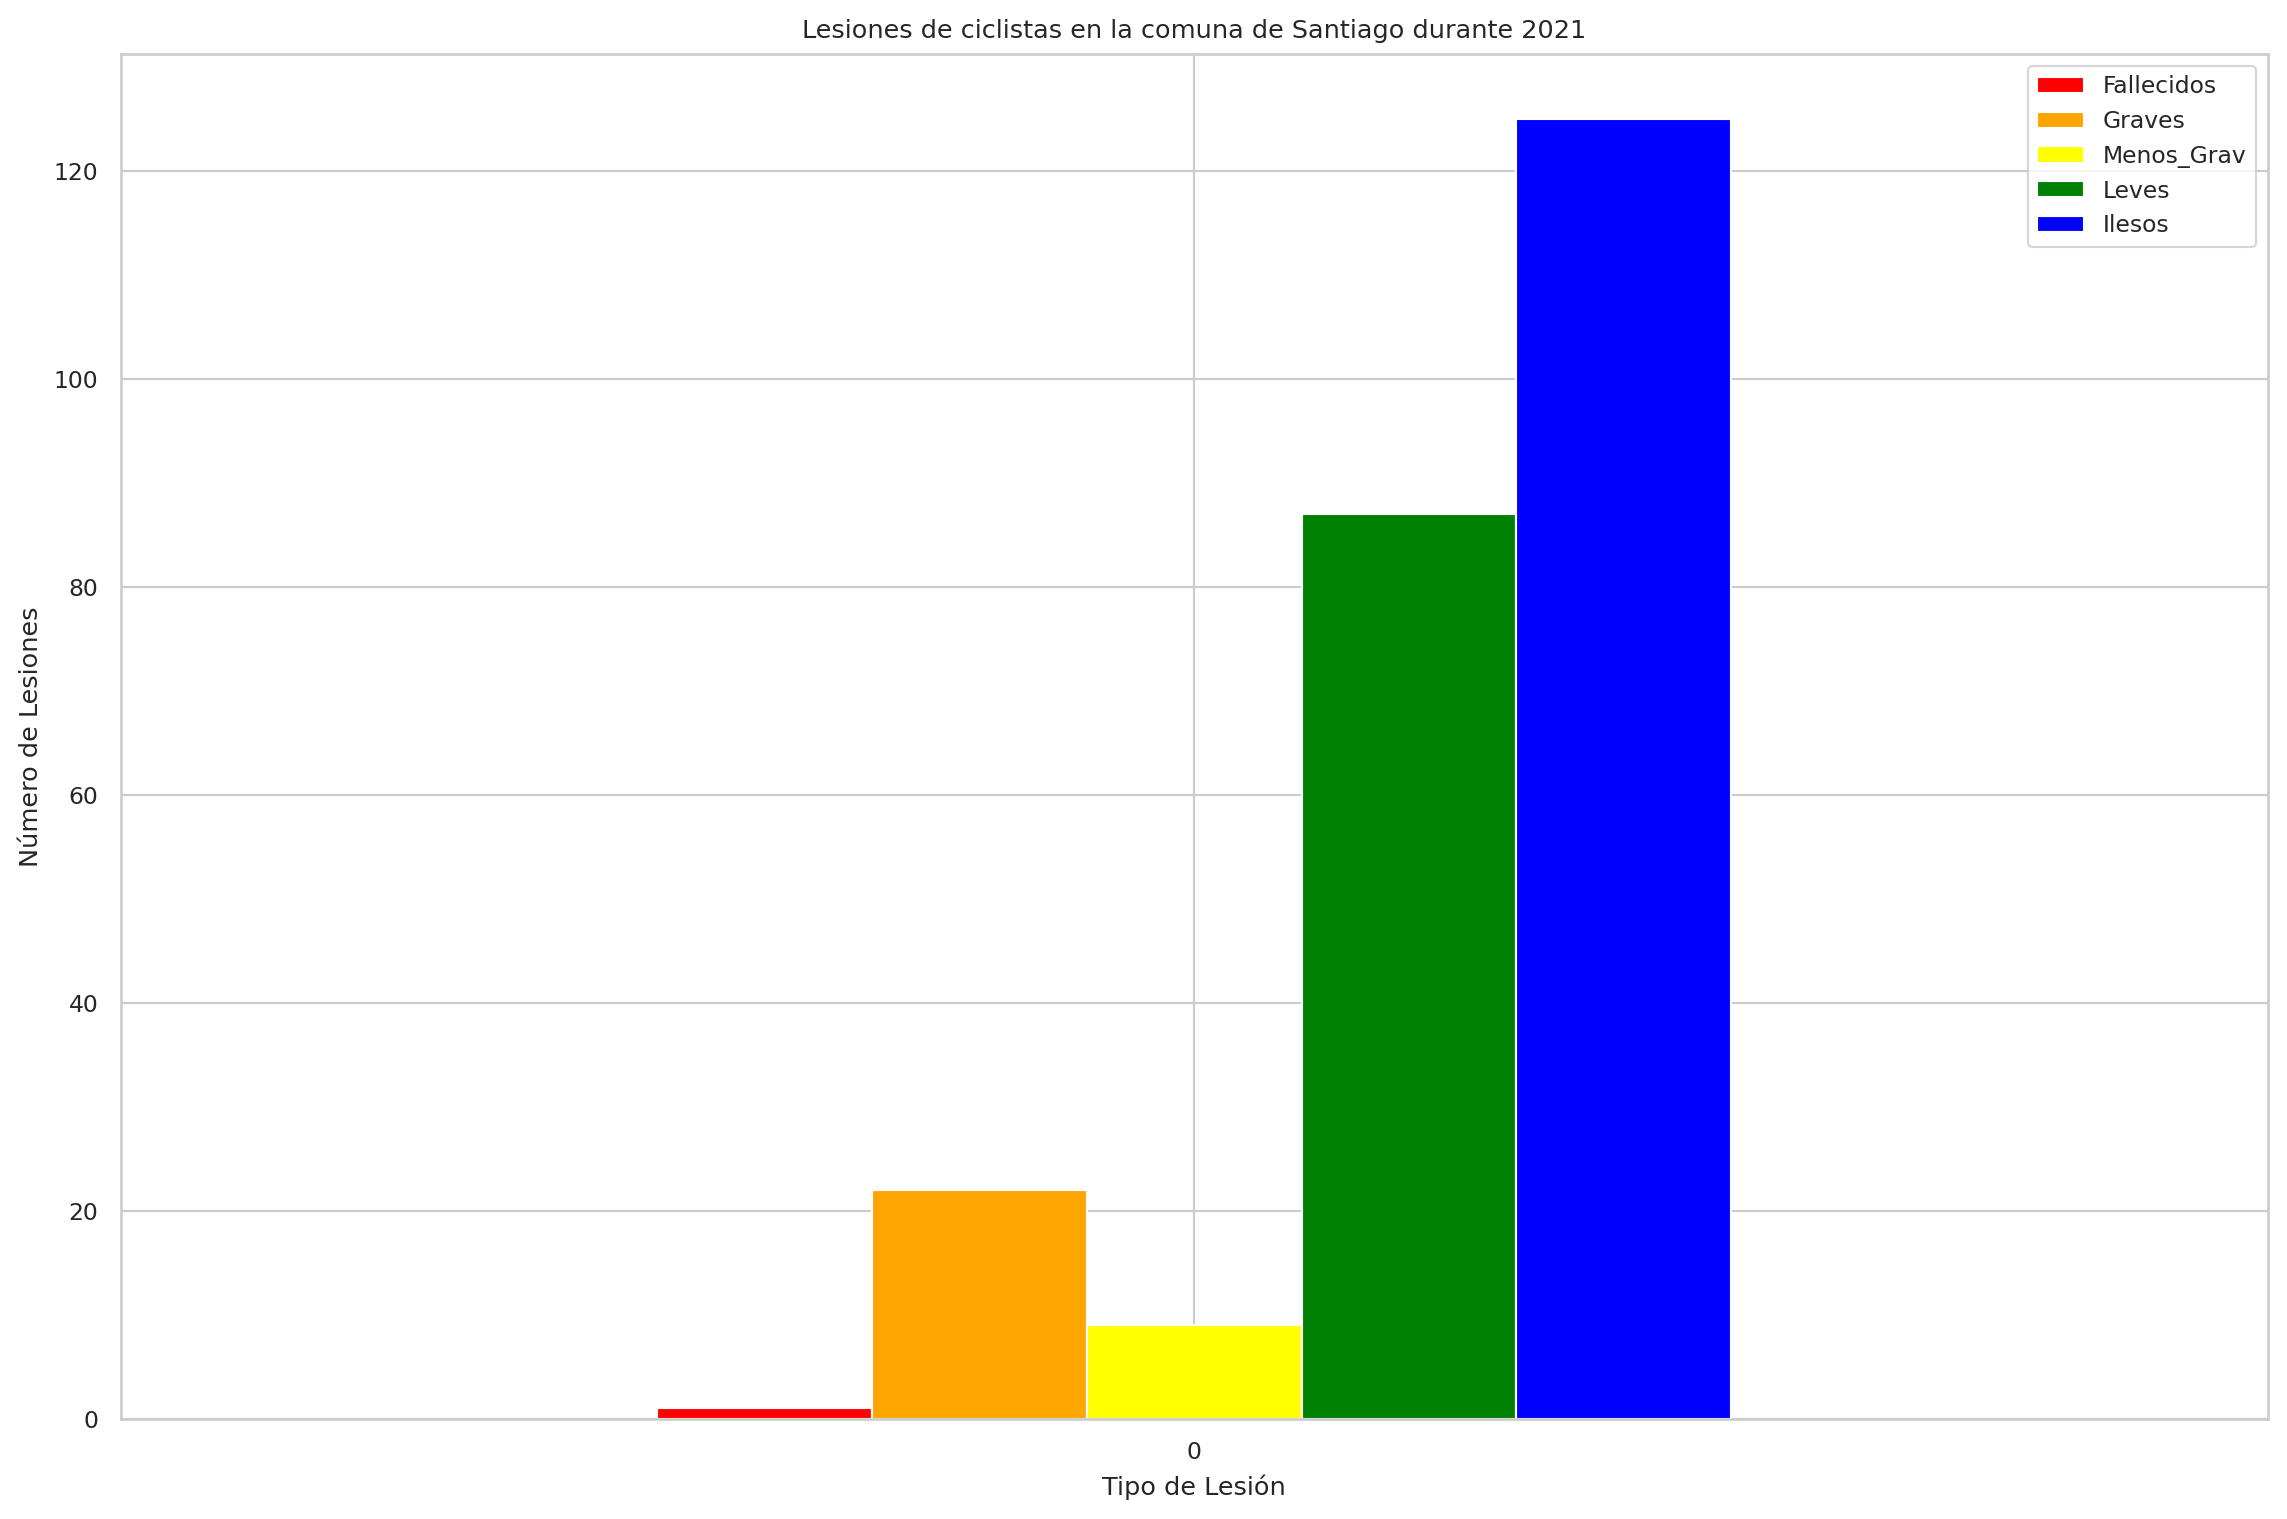

In [8]:




# Group by "COMUNA" and "Recomendad"
df_grouped = df_2021.groupby(['COMUNA', 'Recomendad']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
df_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.xlabel('Comuna')
plt.ylabel('Número de Ciclovías')
plt.title('Ciclovías aprobadas y reprobadas por comuna según el Decreto 102 (Recomendado)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Recomendad', labels=['Aprobado', 'Reprobado'])
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Group by "COMUNA" and "SingularId"
df_grouped = df_2021.groupby(['COMUNA', 'Singularid']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
df_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.xlabel('Comuna')
plt.ylabel('Número de Ciclovías')
plt.title('Ciclovías aprobadas y reprobadas por comuna según el Decreto 102 (Singularidad)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='SingularId', labels=['Aprobado', 'Reprobado'])
plt.tight_layout()  # Adjust layout to fit labels
plt.show()




# Filter all rows in "COMUNA" "SANTIAGO"
df_filtered = df_2021_sin[df_2021_sin['COMUNA'] == 'SANTIAGO']

# Count the number of row "Fallecidos" in all rows
total_deaths = df_filtered['Fallecidos'].sum()
# Count the number of row "Graves" in all rows
total_serious_injuries = df_filtered['Graves'].sum()
# Count the number of row "Menos_Grav" in all rows
total_minor_injuries = df_filtered['Menos_Grav'].sum()
# Count the number of row "Leves" in all rows
total_light_injuries = df_filtered['Leves'].sum()
# Count the number of row "Ilesos" in all rows
total_unharmed = df_filtered['Ilesos'].sum()

# Create a new DataFrame with the calculated values
df_summary = gpd.GeoDataFrame({
    'Fallecidos': [total_deaths],
    'Graves': [total_serious_injuries],
    'Menos_Grav': [total_minor_injuries],
    'Leves': [total_light_injuries],
    'Ilesos': [total_unharmed]
})

# Plot the data
plt.figure(figsize=(12, 8))
df_summary.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue'], ax=plt.gca())
plt.xlabel('Tipo de Lesión')
plt.ylabel('Número de Lesiones')
plt.title('Lesiones de ciclistas en la comuna de Santiago durante 2021')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Crear los puntos en donde esta la persona

In [ ]:
from aves.features.geo import to_point_geodataframe

origenes_viajes = to_point_geodataframe(
    viajes_persona, "OrigenCoordX", "OrigenCoordY", crs="epsg:32719"
)

In [ ]:
from aves.visualization.maps import heat_map

grid = GeoFacetGrid(
    origenes_viajes,
    context=zones,
    col="ModoDifusion",
    col_order=["Auto", "Bip!", "Caminata", "Bicicleta"],
    height=9,
    hue="ModoDifusion"
)

grid.add_layer(zones, color="#efefef", edgecolor="white", linewidth=1)

grid.add_layer(
    heat_map,
    # atributo de los datos con la importancia o peso de cada viaje
    weight="Peso",
    # cantidad de niveles/colores del mapa de calor
    n_levels=5,
    # radio de influencia de cada viaje
    bandwidth=1000,
    # valor de corte para los valores bajos del heatmap
    low_threshold=0.025,
    # transparencia
    alpha=0.75,
    # paleta de colores
    palette="inferno"
)